<a href="https://colab.research.google.com/github/felipecortesl-dotcom/Tareas/blob/main/tarea_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultados numéricos
Número de puntos (RK4): 20
Número de puntos (RK5): 20
Error máximo método orden 4: 3.351688344643833e-07
Error máximo método orden 5: 2.397856169178425e-08



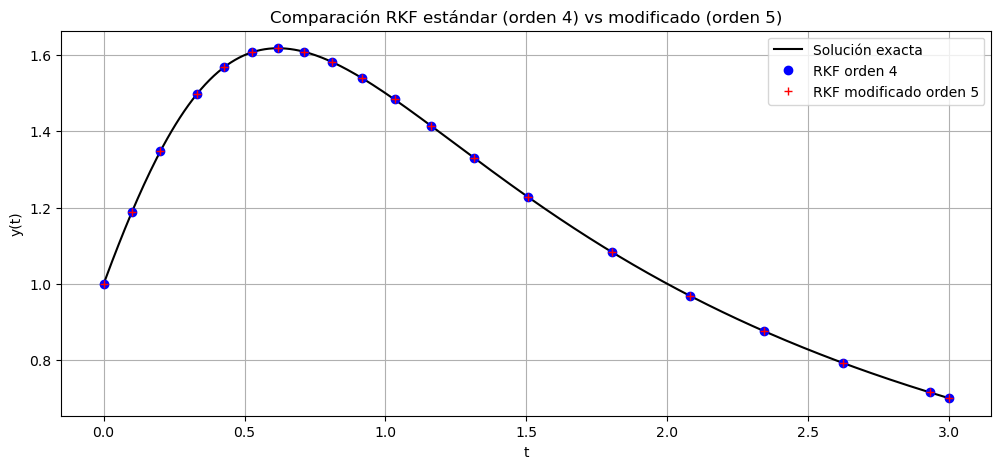

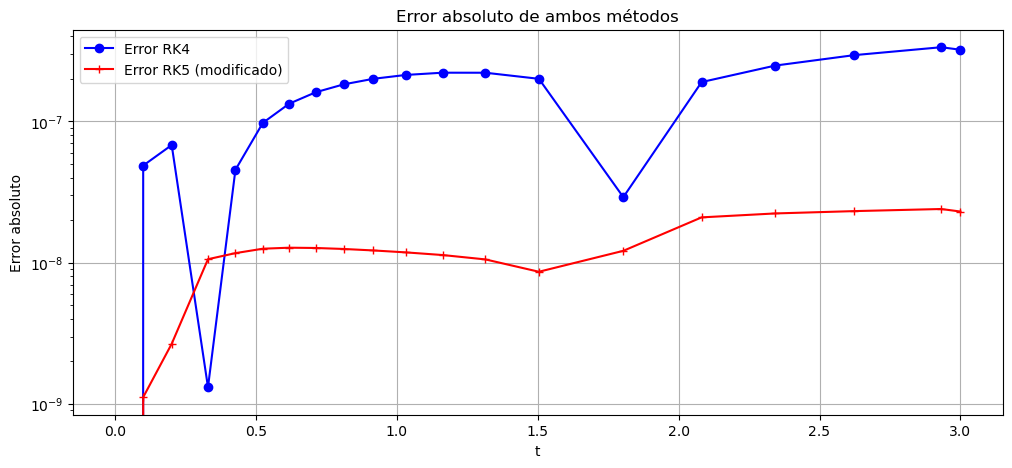

Primeras filas de la comparación:


,t,y_exacta,RK4_interp,err_RK4,RK5,err_RK5
0,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000e+00
1,0.100000,1.188119,1.188119,4.868944e-08,1.188119,1.114892e-09
2,0.201143,1.347758,1.347758,6.801745e-08,1.347758,2.663576e-09
3,0.329903,1.496891,1.496891,1.446641e-09,1.496891,1.057815e-08
4,0.427275,1.568245,1.568245,4.527571e-08,1.568245,1.167949e-08
5,0.524684,1.606978,1.606978,9.757492e-08,1.606978,1.255261e-08
6,0.618109,1.618034,1.618034,1.333771e-07,1.618034,1.276029e-08
7,0.712558,1.608446,1.608446,1.607833e-07,1.608446,1.270093e-08
8,0.811163,1.581634,1.581634,1.827205e-07,1.581634,1.249914e-08
9,0.916664,1.539624,1.539624,2.001728e-07,1.539624,1.220199e-08



DISCUSIÓN:

El método Runge–Kutta–Fehlberg (RKF45) utiliza dos aproximaciones embebidas: una de orden 4 y
otra de orden 5. La diferencia entre ambas se usa como estimador del error local del método de
orden 4, por lo que el control de paso (la fórmula del nuevo h) está diseñado para esta
aproximación de cuarto orden.

En la implementación estándar se acepta la solución de orden 4, mientras que la de orden 5 se
usa sólo para estimar el error y ajustar el tamaño del paso. En esta tarea se modificó el
algoritmo para quedarse con la solución de orden 5 como aproximación final. Los resultados
muestran que el método modificado tiene un error global claramente menor (de orden 10^-8 en
este problema), mientras que el método estándar ya cumple holgadamente la tolerancia fijada
(errores de orden 10^-7), y ambos usan prácticamente la misma cantidad de pasos porque calculan
los mismos k1,...,k6.

En la práctica se suele usar la solución de orden 4 porque:
  - Es la que está siendo controlada dire

In [1]:
# ===============================================================
#   MÉTODO RUNGE–KUTTA–FEHLBERG (RKF45)
#   Se usa la solución de orden 5 como solución aceptada
#   Tolerancia: 1e-6
#   Problema: y' = (2 - 2ty)/(t**2 + 1),  y(0)=1,  0 ≤ t ≤ 3
#   Solución exacta: y(t) = (2t+1)/(t**2+1)
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------------------------
# Definición de la ecuación diferencial y solución exacta
# -----------------------------------------------
def f(t, y):
    return (2 - 2*t*y)/(t**2 + 1)

def y_exact(t):
    return (2*t + 1)/(t**2 + 1)

# -----------------------------------------------
# Implementación general de RKF45
# use_order = 4  → método estándar
# use_order = 5  → método modificado (lo pedido en el enunciado)
# -----------------------------------------------
def rkf45(t0, y0, b, tol=1e-6, h0=0.1, use_order=4):
    t = t0
    w = y0
    h = h0

    T = [t]
    W = [w]

    while t < b:
        # Ajustar último paso para llegar exactamente a b
        if t + h > b:
            h = b - t

        # Cálculo de los k de Fehlberg
        k1 = h * f(t, w)
        k2 = h * f(t + h/4,         w + k1/4)
        k3 = h * f(t + 3*h/8,       w + 3*k1/32 + 9*k2/32)
        k4 = h * f(t + 12*h/13,     w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * f(t + h,           w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * f(t + h/2,         w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        # Aproximación de orden 4
        w4 = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5

        # Aproximación de orden 5 (la que pide el enunciado)
        w5 = w + 16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55

        # Estimador del error local (basado en orden 4)
        R = abs(w5 - w4)/h

        # Aceptar o rechazar paso
        if R <= tol:
            t += h
            w = w4 if use_order == 4 else w5  # elegimos qué orden usar
            T.append(t)
            W.append(w)

        # Actualizar tamaño de paso (control de error para orden 4)
        if R == 0:
            q = 4.0
        else:
            q = 0.84*(tol/R)**0.25
            q = min(4.0, max(0.1, q))

        h *= q

    return np.array(T), np.array(W)

# -----------------------------------------------
# Correr ambos métodos y comparar
# -----------------------------------------------
tol = 1e-6
t0, y0, b = 0.0, 1.0, 3.0

# Método estándar (usa solución de orden 4)
T4, W4 = rkf45(t0, y0, b, tol=tol, use_order=4)

# Método modificado (usa solución de orden 5)
T5, W5 = rkf45(t0, y0, b, tol=tol, use_order=5)

# Solución exacta
YEX4 = y_exact(T4)
YEX5 = y_exact(T5)

# Errores
err4 = np.abs(YEX4 - W4)
err5 = np.abs(YEX5 - W5)

print("========================================")
print("Resultados numéricos")
print("========================================")
print("Número de puntos (RK4):", len(T4))
print("Número de puntos (RK5):", len(T5))
print("Error máximo método orden 4:", np.max(err4))
print("Error máximo método orden 5:", np.max(err5))
print("========================================\n")

# -----------------------------------------------
# Gráfica soluciones
# -----------------------------------------------
plt.figure(figsize=(12,5))
t_plot = np.linspace(t0, b, 400)
plt.plot(t_plot, y_exact(t_plot), 'k-', label='Solución exacta')
plt.plot(T4, W4, 'bo', label='RKF orden 4')
plt.plot(T5, W5, 'r+', label='RKF modificado orden 5')
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación RKF estándar (orden 4) vs modificado (orden 5)")
plt.show()

# -----------------------------------------------
# Gráfica errores
# -----------------------------------------------
plt.figure(figsize=(12,5))
plt.semilogy(T4, err4, 'bo-', label='Error RK4')
plt.semilogy(T5, err5, 'r+-', label='Error RK5 (modificado)')
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("Error absoluto")
plt.title("Error absoluto de ambos métodos")
plt.show()

# -----------------------------------------------
# Tabla comparativa (primeras filas)
# -----------------------------------------------
# Interpolamos la solución RK4 en los tiempos T5 para comparar en mismos puntos
W4_interp = np.interp(T5, T4, W4)
err4_interp = np.abs(W4_interp - YEX5)

data = {
    "t": T5,
    "y_exacta": YEX5,
    "RK4_interp": W4_interp,
    "err_RK4": err4_interp,
    "RK5": W5,
    "err_RK5": err5
}

df = pd.DataFrame(data)
print("Primeras filas de la comparación:")
display(df.head(10))

# -----------------------------------------------
# Discusión final impresa (para el informe)
# -----------------------------------------------
texto = """
DISCUSIÓN:

El método Runge–Kutta–Fehlberg (RKF45) utiliza dos aproximaciones embebidas: una de orden 4 y
otra de orden 5. La diferencia entre ambas se usa como estimador del error local del método de
orden 4, por lo que el control de paso (la fórmula del nuevo h) está diseñado para esta
aproximación de cuarto orden.

En la implementación estándar se acepta la solución de orden 4, mientras que la de orden 5 se
usa sólo para estimar el error y ajustar el tamaño del paso. En esta tarea se modificó el
algoritmo para quedarse con la solución de orden 5 como aproximación final. Los resultados
muestran que el método modificado tiene un error global claramente menor (de orden 10^-8 en
este problema), mientras que el método estándar ya cumple holgadamente la tolerancia fijada
(errores de orden 10^-7), y ambos usan prácticamente la misma cantidad de pasos porque calculan
los mismos k1,...,k6.

En la práctica se suele usar la solución de orden 4 porque:
  - Es la que está siendo controlada directamente por la tolerancia (el estimador de error
    está asociado al orden 4).
  - La solución de orden 5 se obtiene para estimar el error sin un ahorro real de evaluaciones,
    así que la ganancia al reportarla como solución final es pequeña para muchas aplicaciones.

Para este problema en particular, ambos métodos satisfacen la tolerancia 10^-6, pero la versión
modificada con la solución de orden 5 entrega una aproximación todavía más precisa con el mismo
costo computacional.
"""

print(texto)


# Nota: 6.0

Retraso en la entrega.

Se usó demasiado la IA.